In [4]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import classification_report, f1_score ,roc_auc_score, accuracy_score, balanced_accuracy_score, top_k_accuracy_score, precision_score, recall_score, f1_score,confusion_matrix
from sklearn.metrics import make_scorer
from imblearn.metrics import geometric_mean_score
from xgboost import XGBClassifier

from sklearn.model_selection import train_test_split
# Oversampling and under sampling
from imblearn.over_sampling import RandomOverSampler, SMOTE
from imblearn.under_sampling import RandomUnderSampler, NearMiss
from collections import Counter
from prettytable import PrettyTable
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
os.chdir('C:/mydir') # change to data location
print("Current working directory: {0}".format(os.getcwd()))

Current working directory: C:\Users\Alex\Desktop\classification_github


In [5]:
data = pd.read_csv("classification.csv")
data.head

<bound method NDFrame.head of        Unnamed: 0        V1        V2        V3        V4        V5        V6  \
0          192992  1.746293 -1.475827 -1.176263 -0.806497 -0.455586  0.416916   
1          145398 -1.933007  2.170092 -1.019098  0.994077 -0.222465  0.419611   
2          257703 -1.906249  2.259575 -3.456809 -1.555935  1.694769  2.968648   
3           78123  0.736022 -0.559744 -0.138791  1.524676 -0.355671 -0.340474   
4          232047 -0.099218  0.718205  0.594968 -0.118072  0.068231 -1.703281   
...           ...       ...       ...       ...       ...       ...       ...   
99995      112677  1.072345 -0.163925  0.137887  0.155318 -0.528788 -1.207986   
99996      144806  1.882193 -0.068849 -1.338027  1.303409  0.107585 -1.033095   
99997      178803  2.064439 -0.106237 -1.142452  0.464749 -0.169575 -1.218420   
99998       39554 -0.728786  0.489003  1.903167  1.153231  0.586388  1.758385   
99999      232431  0.146007  0.988758 -0.603563 -0.787686  1.249384 -0.204477  

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 31 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   Unnamed: 0  100000 non-null  int64  
 1   V1          100000 non-null  float64
 2   V2          100000 non-null  float64
 3   V3          100000 non-null  float64
 4   V4          100000 non-null  float64
 5   V5          100000 non-null  float64
 6   V6          100000 non-null  float64
 7   V7          100000 non-null  float64
 8   V8          100000 non-null  float64
 9   V9          100000 non-null  float64
 10  V10         100000 non-null  float64
 11  V11         100000 non-null  float64
 12  V12         100000 non-null  float64
 13  V13         100000 non-null  float64
 14  V14         100000 non-null  float64
 15  V15         100000 non-null  float64
 16  V16         100000 non-null  float64
 17  V17         100000 non-null  float64
 18  V18         100000 non-null  float64
 19  V19

In [7]:
data.isnull().sum()

Unnamed: 0    0
V1            0
V2            0
V3            0
V4            0
V5            0
V6            0
V7            0
V8            0
V9            0
V10           0
V11           0
V12           0
V13           0
V14           0
V15           0
V16           0
V17           0
V18           0
V19           0
V20           0
V21           0
V22           0
V23           0
V24           0
V25           0
V26           0
V27           0
V28           0
Class         0
V29           0
dtype: int64

#### Description of the data.

In [8]:
data.describe()

,Unnamed: 0,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Class,V29
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,...,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,142329.852070,0.000885,-0.003707,0.002978,-0.005153,0.003109,-0.001276,0.000434,-0.002431,-0.006063,...,0.000611,-0.002329,-0.002472,-0.002502,-0.001278,0.000045,-0.000409,-0.000540,0.001730,8.885048
std,82131.413118,1.933672,1.647123,1.501978,1.413148,1.408358,1.346129,1.258873,1.201049,1.094925,...,0.739645,0.727456,0.630689,0.605603,0.520260,0.483064,0.404660,0.320855,0.041557,26.103684
min,0.000000,-40.470142,-60.464618,-48.325589,-5.416315,-113.743307,-21.929312,-33.239328,-50.943369,-10.842526,...,-22.889347,-9.499423,-32.828995,-2.824849,-8.696627,-2.604551,-22.565679,-15.430084,0.000000,0.000000
25%,71079.750000,-0.920446,-0.602093,-0.884214,-0.850343,-0.693751,-0.768357,-0.553170,-0.208844,-0.648607,...,-0.229348,-0.543823,-0.163770,-0.355694,-0.318015,-0.327781,-0.071095,-0.053099,0.000000,0.552000
50%,142226.500000,0.008738,0.064967,0.178816,-0.029706,-0.053770,-0.275355,0.040950,0.022258,-0.054630,...,-0.030414,0.007251,-0.012214,0.039884,0.016627,-0.053660,0.001211,0.011374,0.000000,2.214000
75%,213330.250000,1.312826,0.803071,1.024405,0.736172,0.612755,0.400304,0.572450,0.326067,0.589600,...,0.187173,0.524716,0.146695,0.435526,0.348869,0.240239,0.091121,0.079126,0.000000,7.800000
max,284804.000000,2.454930,16.697832,9.382558,16.875344,32.911462,73.301626,120.589494,19.168327,15.594995,...,27.202839,7.357255,20.803344,4.584549,5.826159,3.517346,31.612198,15.942151,1.000000,2569.116000


#### Visualization of the data.

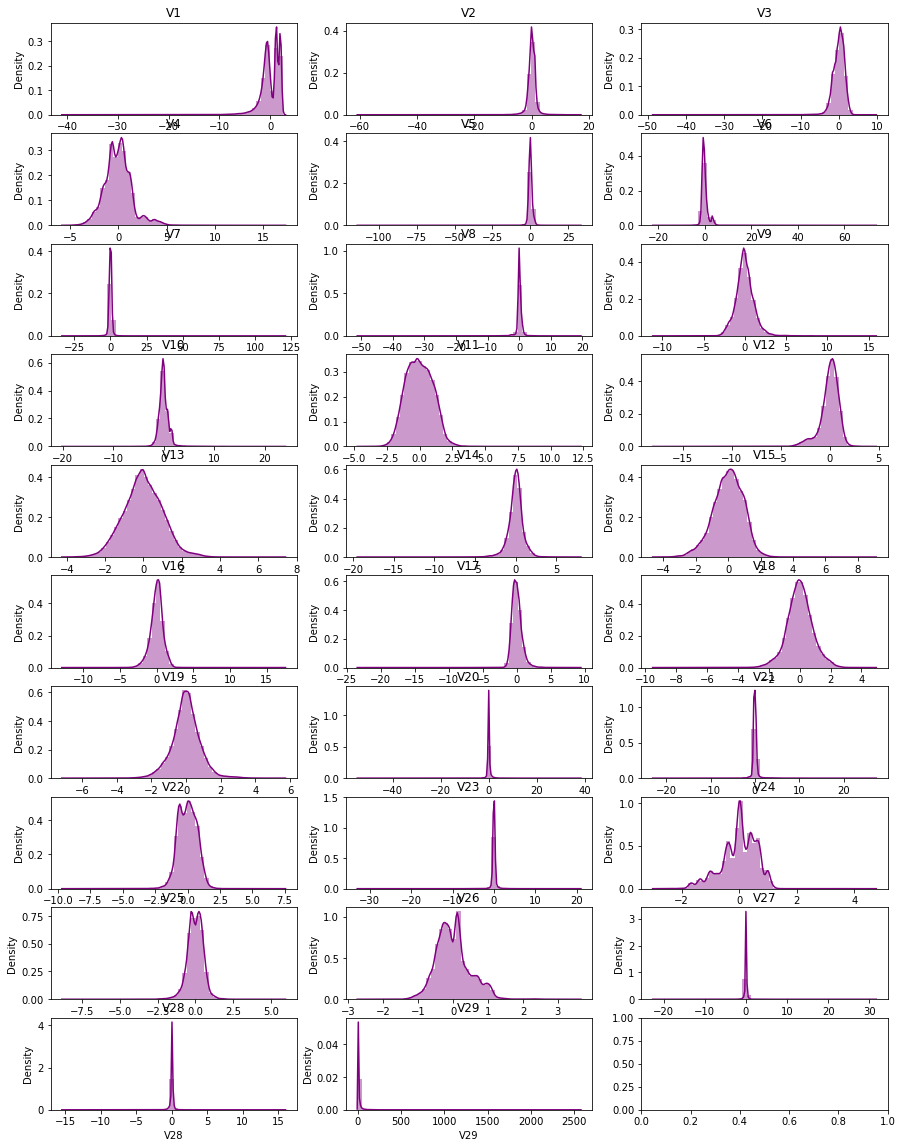

In [9]:
df = data.loc[:,["V"+str(i+1) for i in range(29)]]
x = 10
y = 3

fig, ax = plt.subplots(x, y, figsize=(15, 20))
col = 0
column = df.columns
for i in range(x):
    for j in range(y):
        if col < df.shape[1]:
            sns.distplot(df[column[col]], color='purple', ax=ax[i][j])
            ax[i][j].set_title(*[column[col]])
            col+=1

##### We note that most of the features contain outliers, below we remove the outliers and recheck the distributions.

<AxesSubplot:>

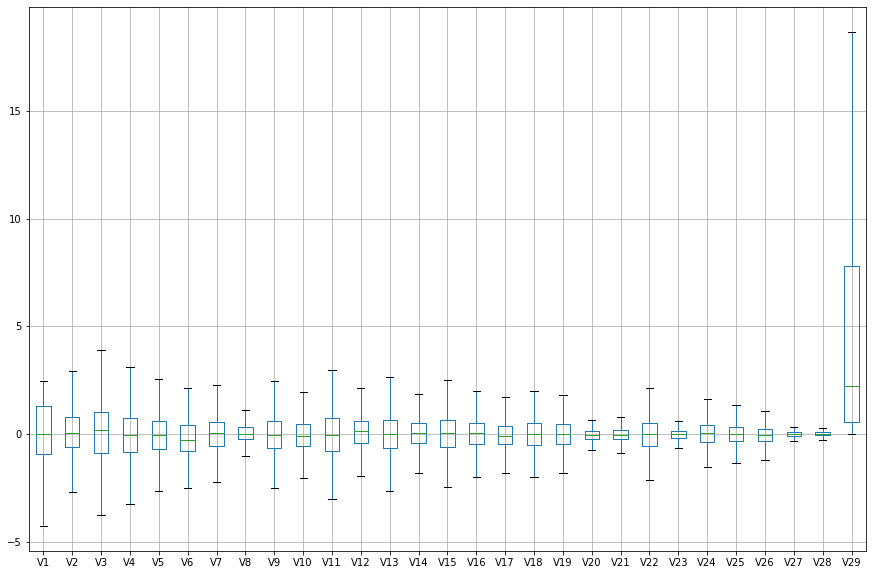

In [10]:
def find_outliers_limit(df, col):
    q25, q75 = np.percentile(df[col], 25), np.percentile(df[col], 75)
    iqr = q75 - q25
    cut_off = iqr * 1.5
    lower, upper = q25 - cut_off, q75 + cut_off
    return lower, upper


def remove_outlier(df, col, upper, lower):
    outliers = [x for x in df[col] if x >= upper]
    outliers_removed = [x for x in df[col] if x >= lower and x <= upper]
    final = np.where(df[col] > upper, upper, np.where(df[col] < lower, lower, df[col]))
    return final


outlier_cols = ["V" + str(i + 1) for i in range(29)]
for col in outlier_cols:
    lower, upper = find_outliers_limit(data, col)
    data[col] = remove_outlier(data, col, upper, lower)

plt.figure(figsize=(15, 10))
data[outlier_cols].boxplot()   

##### Below we use Standardization on the features in order to plot them now that we have removed the outliers.

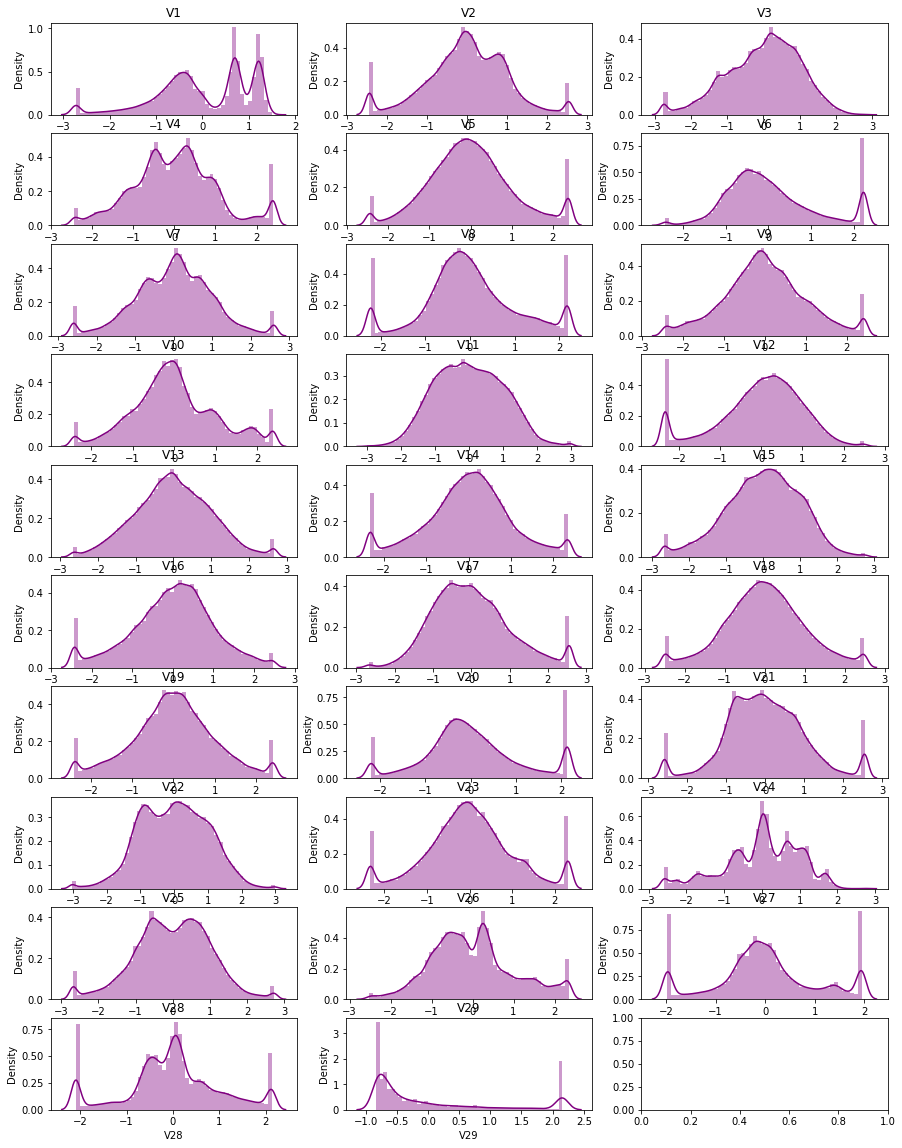

In [11]:
columns = ["V"+str(i+1) for i in range(29)]
X = data.loc[:,columns]
y = data.loc[:,"Class"]
scaler=StandardScaler()
X_scaled=scaler.fit_transform(X)
X_scaled_df = pd.DataFrame(X_scaled,columns=columns)
X_scaled_df["Class"] = y
df = X_scaled_df.loc[:,["V"+str(i+1) for i in range(29)]]
x = 10
y = 3

fig, ax = plt.subplots(x, y, figsize=(15, 20))
col = 0
column = df.columns
for i in range(x):
    for j in range(y):
        if col < df.shape[1]:
            sns.distplot(df[column[col]], color='purple', ax=ax[i][j])
            ax[i][j].set_title(*[column[col]])
            col+=1

##### Below we can see the distribution by Class.

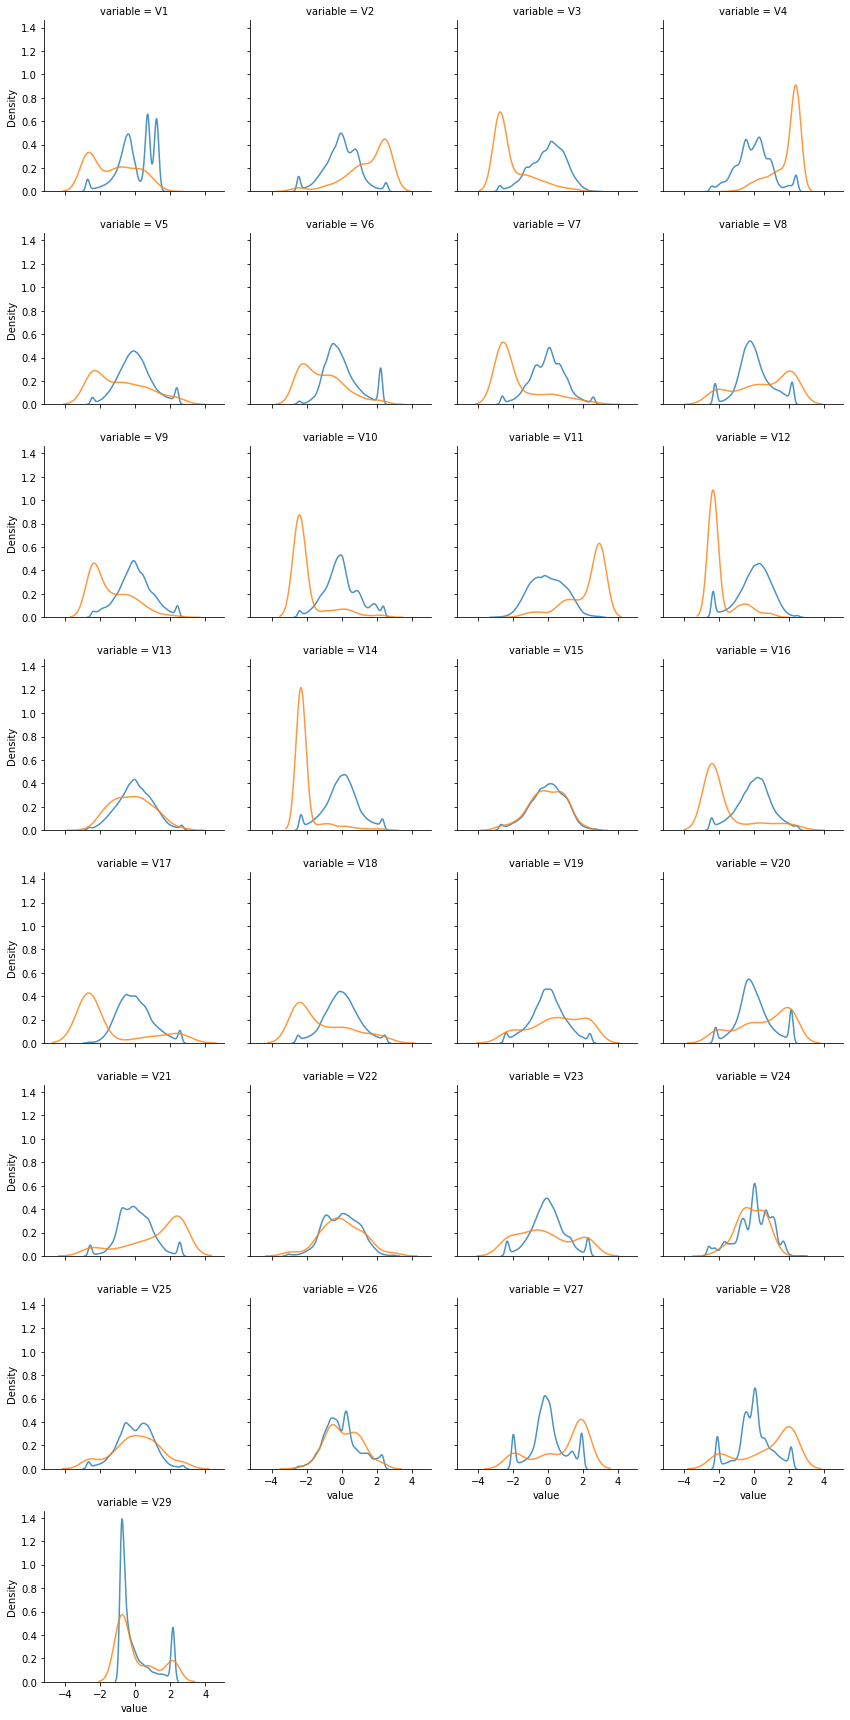

In [12]:
df_melted = X_scaled_df.melt(id_vars='Class')
g = sns.FacetGrid(df_melted, 
                  col='variable', 
                  hue='Class',
                  col_wrap=4)    
g = g.map(sns.kdeplot, "value", alpha=0.8)

In [13]:
X_scaled_df.Class.value_counts()

0    99827
1      173
Name: Class, dtype: int64

#### We note that the dataset is highly imbalanced. 

Since, we do not know the context of the data to decide if we will use oversampling or downsampling we choose to use oversampling.   
First, we will split the data and use the StandarScaler separatelly on train and test set.    
Then we will use the RandomOverSampler to oversample the training set.

In [14]:
X = data.loc[:,columns]
y = data.loc[:,"Class"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)


print('The number of records in the training dataset is', X_train.shape[0])
print('The number of records in the test dataset is', X_test.shape[0])
print(f"The training dataset has {sorted(Counter(y_train).items())[0][1]} records for the majority class and {sorted(Counter(y_train).items())[1][1]} records for the minority class.")

The number of records in the training dataset is 80000
The number of records in the test dataset is 20000
The training dataset has 79858 records for the majority class and 142 records for the minority class.


In [15]:
ros = RandomOverSampler(random_state=42)
X_train_ros, y_train_ros= ros.fit_resample(X_train_scaled, y_train)
print(sorted(Counter(y_train_ros).items()))

[(0, 79858), (1, 79858)]


After random oversampling, the minority category increased from 142 to 79858, the same as the majority category.

### Below we try some classification models and check the model accuracy.
To evalute the classification, since both classes are of equal importance, we will use precision, recall, balanced accuracy, g-mean. Note that in an imbalanced dataset accuracy score is not an indicative metric since the majority class will always drive to high scores.    

The models we are using for this are LogisticRegression, RandomForestClassifier, XGBClassifier.    

Note that since LogisticRegression uses a probabilistic approach exploiting the empirical distribution of the variable Class, is not being affected by oversampling.


In [16]:
def model_evaluate(model,x,y):
    predictions=model.predict(x)
    g_mean = round(geometric_mean_score(y,predictions),2)
    accuracy = round(accuracy_score(y,predictions),2)
    precision = round(precision_score(y, predictions),2)
    recall = round(recall_score(y, predictions),2)
    balanced_accuracy = round(balanced_accuracy_score(y, predictions),2)
    f1 = round(f1_score(y, predictions),2)
    return [g_mean,accuracy,precision,recall,balanced_accuracy,f1]

def train_ml_model(x,y,model_type):
    if model_type=='lr':
        model=LogisticRegression()
    elif model_type=='xgb':
        model=XGBClassifier()
    elif model_type=='rf':
        model=RandomForestClassifier()
    model.fit(x,y)
    return model

#### First we will test the models on the imbanced training set.

In [17]:
model_lr=train_ml_model(X_train_scaled,y_train,'lr')
model_xgb=train_ml_model(X_train_scaled,y_train,'xgb')
model_rf=train_ml_model(X_train_scaled,y_train,'rf')

In [18]:
summary=PrettyTable(["Model",'gmean','accuracy','precision','recall','balanced_accuracy','f1_score'])
summary.add_row(['lr']+model_evaluate(model_lr,X_test_scaled,y_test.to_numpy()))
summary.add_row(['xgb']+model_evaluate(model_xgb,X_test_scaled,y_test.to_numpy()))
summary.add_row(['rf']+model_evaluate(model_rf,X_test_scaled,y_test.to_numpy()))

In [19]:
print("Imbalanced")
print(summary)

Imbalanced
+-------+-------+----------+-----------+--------+-------------------+----------+
| Model | gmean | accuracy | precision | recall | balanced_accuracy | f1_score |
+-------+-------+----------+-----------+--------+-------------------+----------+
|   lr  |  0.82 |   1.0    |    0.88   |  0.68  |        0.84       |   0.76   |
|  xgb  |  0.8  |   1.0    |    1.0    |  0.65  |        0.82       |   0.78   |
|   rf  |  0.82 |   1.0    |    0.88   |  0.68  |        0.84       |   0.76   |
+-------+-------+----------+-----------+--------+-------------------+----------+


##### Confusion matrix LogisticRegression

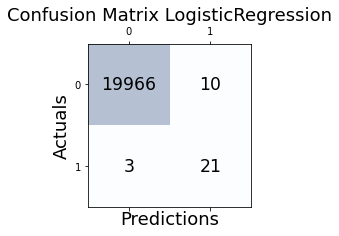

In [20]:
conf_matrix = confusion_matrix(model_lr.predict(X_test_scaled),y_test.to_numpy())
fig, ax = plt.subplots(figsize=(3, 3))
ax.matshow(conf_matrix, cmap=plt.cm.Blues, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix LogisticRegression', fontsize=18)
plt.show()


##### Confusion matrix XGBClassifier

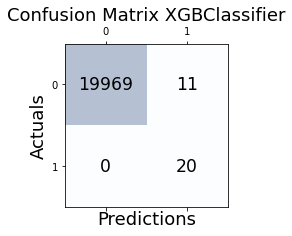

In [21]:
conf_matrix = confusion_matrix(model_xgb.predict(X_test_scaled),y_test.to_numpy())
fig, ax = plt.subplots(figsize=(3,3))
ax.matshow(conf_matrix, cmap=plt.cm.Blues, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix XGBClassifier', fontsize=18)
plt.show()


##### Confusion matrix RandomForestClassifier

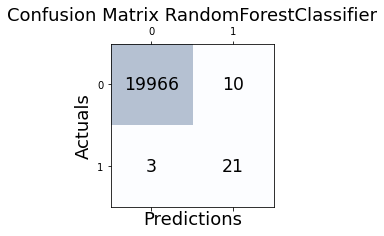

In [22]:
conf_matrix = confusion_matrix(model_rf.predict(X_test_scaled),y_test.to_numpy())
fig, ax = plt.subplots(figsize=(3,3))
ax.matshow(conf_matrix, cmap=plt.cm.Blues, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix RandomForestClassifier', fontsize=18)
plt.show()

### Below we test the same process on the balanced dataset

In [23]:
model_xgb=train_ml_model(X_train_ros,y_train_ros,'xgb')
model_rf=train_ml_model(X_train_ros,y_train_ros,'rf')

In [24]:
summary_ros=PrettyTable(["Model",'gmean','accuracy','precision','recall','balanced_accuracy','f1_score'])
summary_ros.add_row(['xgb']+model_evaluate(model_xgb,X_test_scaled,y_test.to_numpy()))
summary_ros.add_row(['rf']+model_evaluate(model_rf,X_test_scaled,y_test.to_numpy()))

In [25]:
print(summary_ros)

+-------+-------+----------+-----------+--------+-------------------+----------+
| Model | gmean | accuracy | precision | recall | balanced_accuracy | f1_score |
+-------+-------+----------+-----------+--------+-------------------+----------+
|  xgb  |  0.84 |   1.0    |    0.88   |  0.71  |        0.85       |   0.79   |
|   rf  |  0.78 |   1.0    |    0.95   |  0.61  |        0.81       |   0.75   |
+-------+-------+----------+-----------+--------+-------------------+----------+


Confusion matrix XGBClassifier on balanced set

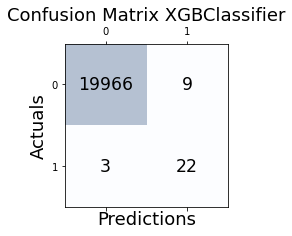

In [26]:
conf_matrix = confusion_matrix(model_xgb.predict(X_test_scaled),y_test.to_numpy())
fig, ax = plt.subplots(figsize=(3,3))
ax.matshow(conf_matrix, cmap=plt.cm.Blues, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')

plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix XGBClassifier', fontsize=18)
plt.show()

Confusion matrix RandomForestClassifier on balanced set

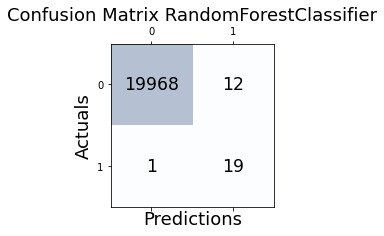

In [27]:
conf_matrix = confusion_matrix(model_rf.predict(X_test_scaled),y_test.to_numpy())
fig, ax = plt.subplots(figsize=(3,3))
ax.matshow(conf_matrix, cmap=plt.cm.Blues, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix RandomForestClassifier', fontsize=18)
plt.show()

We note that in the case of the RandomForestClassifier, the balanced dataset did not help.   

However, XGBClassifier seems to have performed much better than any other attempt. 

### Below we are running a 5-fold cross validation to tune the parameters of XGBClassifier using the GridSearch approach.

In [25]:
param_test1 = {
 'max_depth':range(3,10,2),
 'min_child_weight':range(1,6,2)
}
gsearch1 = GridSearchCV(
    estimator = XGBClassifier( learning_rate =0.1,
                               n_estimators=140,
                               max_depth=5,
                               min_child_weight=1,
                               gamma=0,
                               subsample=0.8,
                               colsample_bytree=0.8,
                               objective= 'binary:logistic',
                               nthread=4,
                               scale_pos_weight=1,
                               seed=27),
    param_grid = param_test1,
    scoring='f1',
    n_jobs=4,
    cv=5)
gsearch1.fit(X_train_ros, y_train_ros)


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=0.8,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     gamma=0, gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=0.1, max_bin=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=5,
                                     max_leaves=None, min_child_weight=1,
                                     missing=nan, monotone_constraints=None,
               

In [26]:
gsearch1.best_params_

{'max_depth': 7, 'min_child_weight': 1}

In [27]:
gsearch1.best_score_

0.9999123536618107

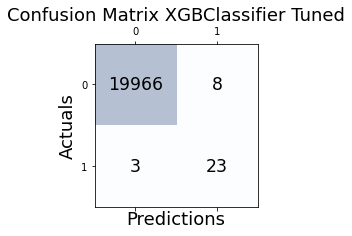

In [28]:
conf_matrix = confusion_matrix(gsearch1.predict(X_test_scaled),y_test.to_numpy())
fig, ax = plt.subplots(figsize=(3,3))
ax.matshow(conf_matrix, cmap=plt.cm.Blues, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix XGBClassifier Tuned', fontsize=18)
plt.show()

In [29]:
summary_final=PrettyTable(["Model",'gmean','accuracy','precision','recall','balanced_accuracy','f1_score'])
summary_final.add_row(['xgb']+model_evaluate(model_xgb,X_test_scaled,y_test.to_numpy()))
summary_final.add_row(['xgb_tuned']+model_evaluate(gsearch1,X_test_scaled,y_test.to_numpy()))
print(summary_final)

+-----------+-------+----------+-----------+--------+-------------------+----------+
|   Model   | gmean | accuracy | precision | recall | balanced_accuracy | f1_score |
+-----------+-------+----------+-----------+--------+-------------------+----------+
|    xgb    |  0.84 |   1.0    |    0.88   |  0.71  |        0.85       |   0.79   |
| xgb_tuned |  0.86 |   1.0    |    0.88   |  0.74  |        0.87       |   0.81   |
+-----------+-------+----------+-----------+--------+-------------------+----------+


#### Further ideas would be to attempt to reduce the dimensionality using PCA.   By keeping only the components with the highest variance could help predictability as well as performance. 